In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Titanic-Dataset.csv.xls')

In [3]:
df.head()
#1 is for survived and 0 for not survived
#data type is fine

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.shape

(891, 12)

In [7]:
(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
print('Cabin :',df['Cabin'].isnull().sum()/df['Cabin'].shape*100)

Cabin : [77.1043771]


In [9]:
missing_percent =df.isnull().sum()/len(df)*100
round(missing_percent,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [10]:
#droping Cabin column as most of the data is missing where imputation will deefinitly gives in accuracy
df.columns
df=df.drop(['Cabin','PassengerId'],axis=1)

In [11]:
df=df.rename(columns={'SibSp':'no_Sibling/Spouse', 'Parch':'no_parent/child', 'Ticket':'Tickt_no'})

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

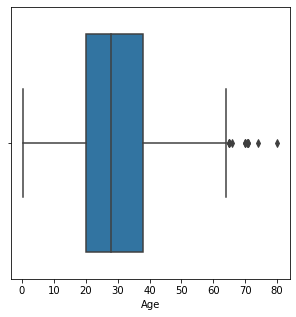

In [12]:
plt.figure(figsize=(5,5))
sns.boxplot(df.Age)

In [13]:
#presence of outlier thus usiing median for imputation
median = df['Age'].median()
df['Age'].replace(np.nan,median,inplace=True)
df['Age'].isnull().sum()

0

In [14]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [15]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [17]:
mode=df['Embarked'].mode()
df['Embarked'].replace(np.nan,mode[0],inplace=True)
df.Embarked.unique()
#here [0] is the index which we got form above cell 

array(['S', 'C', 'Q'], dtype=object)

In [18]:
df.Embarked.replace(to_replace='S',value='Southampton',inplace=True)
df.Embarked.replace(to_replace='C',value='Cherbourg',inplace=True)
df.Embarked.replace(to_replace='Q',value='Queenstown',inplace=True)
#Southampton, Cherbourg, and Queenstown. 

In [19]:
df.isnull().sum()
#missing value treateed

Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
no_Sibling/Spouse    0
no_parent/child      0
Tickt_no             0
Fare                 0
Embarked             0
dtype: int64

In [20]:
df.describe()

,Survived,Pclass,Age,no_Sibling/Spouse,no_parent/child,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'With outlier data')

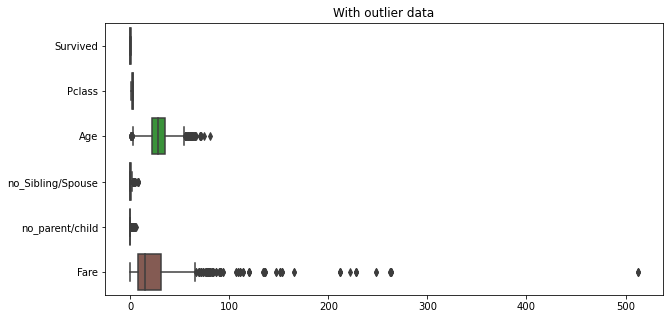

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,orient='h')
plt.title('With outlier data')

In [22]:
#remove the outlieer of Fare and Age is required, no of spouse and child is not needed as it can be truee data
def remove_outlier(cols):
    q1=cols.quantile(0.25)
    q3=cols.quantile(0.75)
    IQR=q3-q1
    lower_limit = q1-(1.5*IQR)
    upper_limit = q1+(1.5*IQR)
    return lower_limit,upper_limit
    

In [23]:
#outlier treatment for Fare
lr,ur = remove_outlier(df['Fare'])
df['Fare']=np.where(df['Fare']<lr,lr,df['Fare'])
df['Fare']=np.where(df['Fare']>ur,ur,df['Fare'])


In [24]:
df_num=df[['Age']]

In [25]:
for i in df_num.columns:
    ll,ul = remove_outlier(df[i])
    df[i]=np.where(df[i]<ll,ll,df[i])
    df[i]=np.where(df[i]>ul,ul,df[i])

<AxesSubplot:>

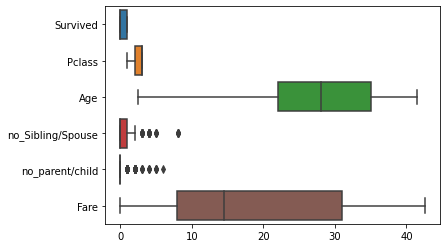

In [26]:
sns.boxplot(data=df,orient='h')

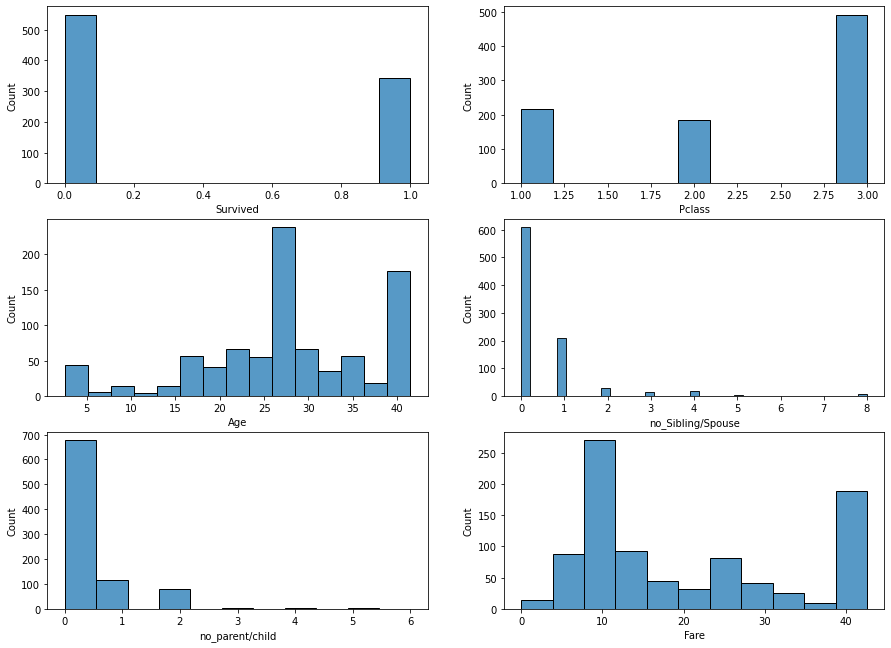

In [27]:
#univariate analysis
j=1
plt.figure(figsize=(15,15))
for i in df.columns:
    if df[i].dtype!='object':
        plt.subplot(4,2,j)
        sns.histplot(data=df[i])
        j=j+1

<AxesSubplot:xlabel='Sex', ylabel='count'>

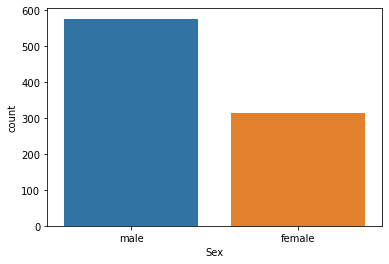

In [28]:
sns.countplot(data=df,x='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

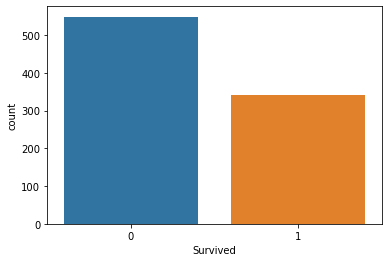

In [29]:
sns.countplot(data=df,x='Survived')

<AxesSubplot:xlabel='no_Sibling/Spouse', ylabel='Survived'>

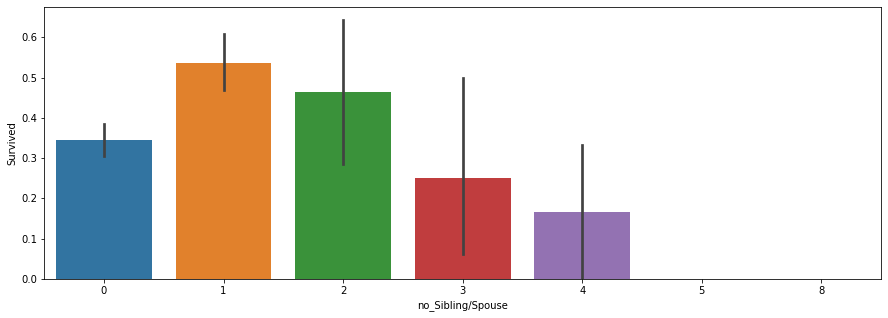

In [30]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x='no_Sibling/Spouse',y='Survived')

<AxesSubplot:xlabel='no_parent/child', ylabel='Survived'>

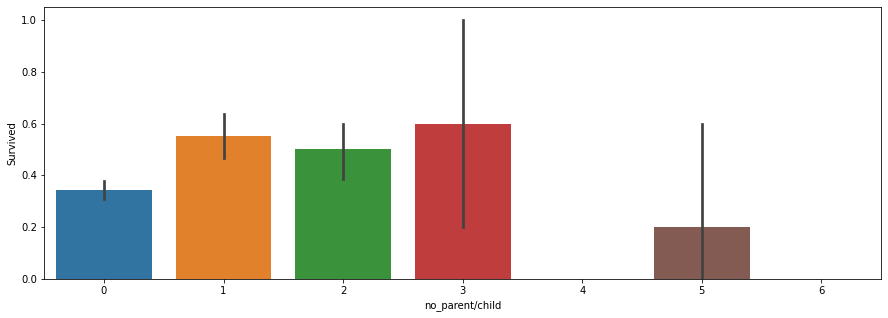

In [31]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x='no_parent/child',y='Survived')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Survived           891 non-null    int64  
 1   Pclass             891 non-null    int64  
 2   Name               891 non-null    object 
 3   Sex                891 non-null    object 
 4   Age                891 non-null    float64
 5   no_Sibling/Spouse  891 non-null    int64  
 6   no_parent/child    891 non-null    int64  
 7   Tickt_no           891 non-null    object 
 8   Fare               891 non-null    float64
 9   Embarked           891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

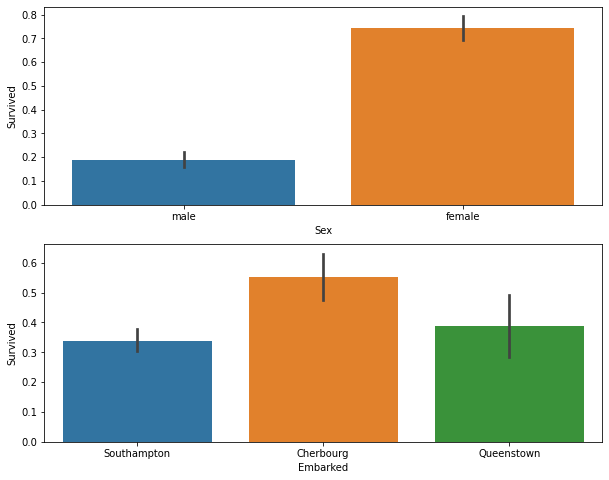

In [33]:
fig,axes=plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(10,8)
sns.barplot(data=df,y='Survived',x='Sex',ax=axes[0])
sns.barplot(data=df,y='Survived',x='Embarked',ax=axes[1])

<AxesSubplot:xlabel='Sex', ylabel='count'>

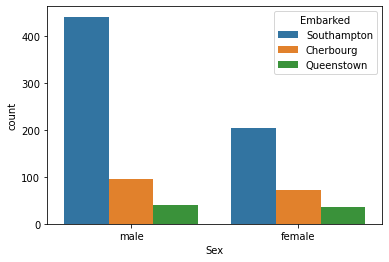

In [34]:
sns.countplot(data=df,x='Sex',hue='Embarked')

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

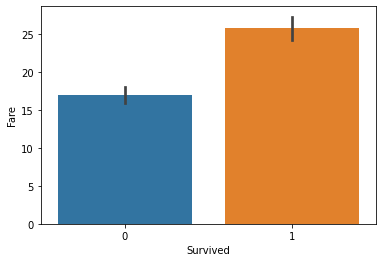

In [35]:
#fare and survival
sns.barplot(data=df,y='Fare',x='Survived')

In [36]:
#created new columns
bins =[1,10,20,30,40,50]
labels =labels = ['0-10', '10-20', '20-30', '30-40', '40-50']
df['agerange'] = pd.cut(df.Age, bins, labels = labels,include_lowest = True)
#any confusion refer this site https://www.geeksforgeeks.org/pandas-cut-method-in-python/

<AxesSubplot:xlabel='agerange', ylabel='Survived'>

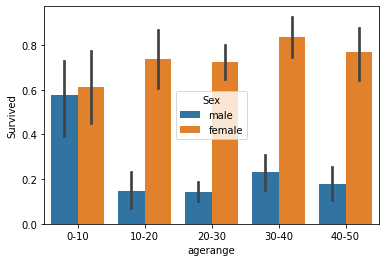

In [37]:
sns.barplot(data=df,x='agerange',y='Survived',hue='Sex')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

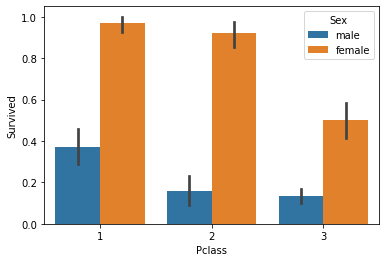

In [38]:
sns.barplot(data=df,x='Pclass',y='Survived',hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='no_Sibling/Spouse'>

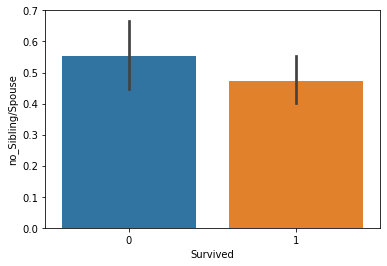

In [39]:
sns.barplot(data=df,y='no_Sibling/Spouse',x='Survived')

#IInsights of univariate and bivariate 
Total number of passenger is 891
Male passenge is around 600 where as female is 350 (approx)
mostly feemale is survived than male
survival is around 300 and non survival is around 500 
mostly parreenger are of 20-30 age group 
survival rate is higheer with 1 sibling followed by 2,3,4
higher the fare higher the survival rate
although female is survived mostly but male with age between 0-1 age has equally survived 


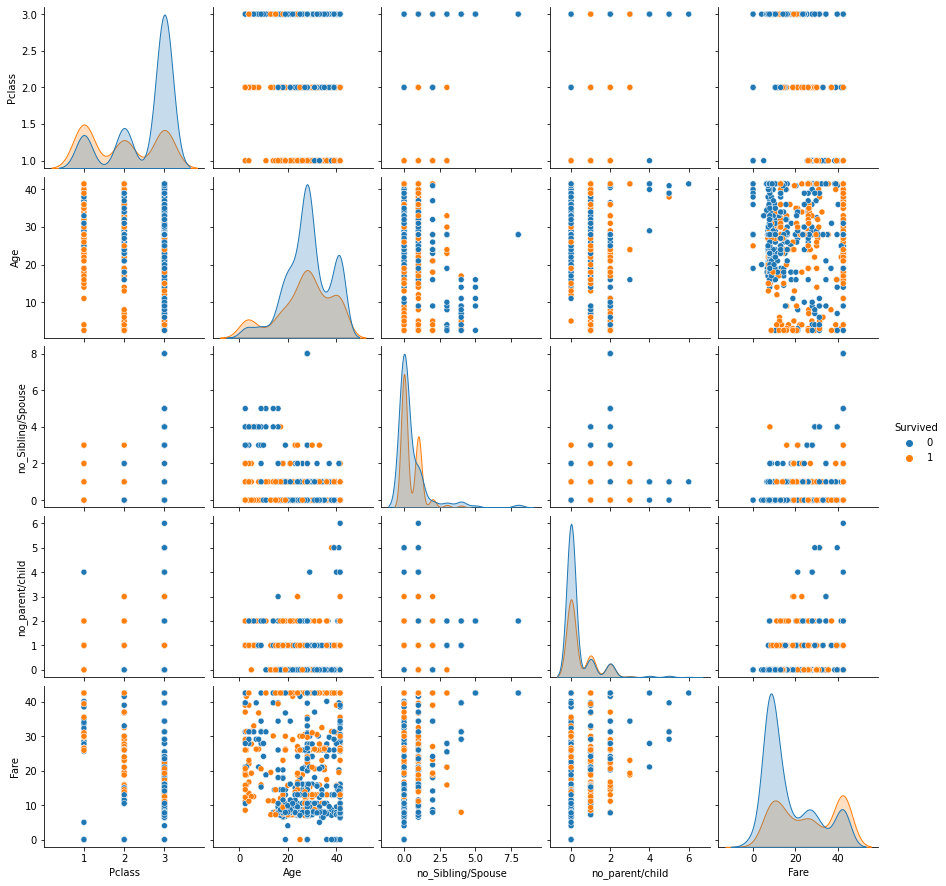

In [40]:
sns.pairplot(data=df,hue='Survived')
#hence theeree is no correlatiion betweeen features

<AxesSubplot:>

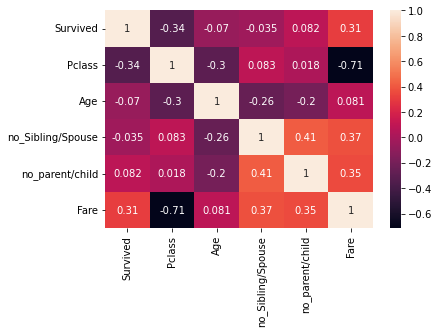

In [41]:
sns.heatmap(data=df.corr(),annot=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Survived           891 non-null    int64   
 1   Pclass             891 non-null    int64   
 2   Name               891 non-null    object  
 3   Sex                891 non-null    object  
 4   Age                891 non-null    float64 
 5   no_Sibling/Spouse  891 non-null    int64   
 6   no_parent/child    891 non-null    int64   
 7   Tickt_no           891 non-null    object  
 8   Fare               891 non-null    float64 
 9   Embarked           891 non-null    object  
 10  agerange           891 non-null    category
dtypes: category(1), float64(2), int64(4), object(4)
memory usage: 70.8+ KB


In [43]:
#lets drop unnecessary column for model building
df_cleaned = df.drop(['Name','Tickt_no','Age',],axis=1)

In [44]:
df_cleaned.isnull().sum()

Survived             0
Pclass               0
Sex                  0
no_Sibling/Spouse    0
no_parent/child      0
Fare                 0
Embarked             0
agerange             0
dtype: int64

In [45]:
df_cleaned.head()

,Survived,Pclass,Sex,no_Sibling/Spouse,no_parent/child,Fare,Embarked,agerange
0,0,3,male,1,0,7.2500,Southampton,20-30
1,1,1,female,1,0,42.5448,Cherbourg,30-40
2,1,3,female,0,0,7.9250,Southampton,20-30
3,1,1,female,1,0,42.5448,Southampton,30-40
4,0,3,male,0,0,8.0500,Southampton,30-40


In [46]:
df.agerange.unique()

['20-30', '30-40', '40-50', '0-10', '10-20']
Categories (5, object): ['0-10' < '10-20' < '20-30' < '30-40' < '40-50']

In [47]:
df_cleaned.describe()

,Survived,Pclass,no_Sibling/Spouse,no_parent/child,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594,20.329505
std,0.486592,0.836071,1.102743,0.806057,13.748023
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,8.000000,6.000000,42.544800


In [48]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Survived           891 non-null    int64   
 1   Pclass             891 non-null    int64   
 2   Sex                891 non-null    object  
 3   no_Sibling/Spouse  891 non-null    int64   
 4   no_parent/child    891 non-null    int64   
 5   Fare               891 non-null    float64 
 6   Embarked           891 non-null    object  
 7   agerange           891 non-null    category
dtypes: category(1), float64(1), int64(4), object(2)
memory usage: 49.9+ KB


In [49]:
#encoding 
#will go for one hot for Sex and label eencoding for agerrage and eembarked
from sklearn.preprocessing import LabelEncoder

In [50]:
df_cleaned.Embarked.value_counts()

Southampton    646
Cherbourg      168
Queenstown      77
Name: Embarked, dtype: int64

In [51]:
df_cleaned.agerange.value_counts()

20-30    407
30-40    155
40-50    150
10-20    115
0-10      64
Name: agerange, dtype: int64

In [52]:
LE = LabelEncoder()

In [53]:
df_cleaned['Embarked']=LE.fit_transform(df_cleaned['Embarked'])

In [54]:
df_cleaned['agerange']=LE.fit_transform(df_cleaned['agerange'])

In [55]:
df_cleaned.agerange.value_counts()

2    407
3    155
4    150
1    115
0     64
Name: agerange, dtype: int64

In [56]:
df_cleaned.Embarked.value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [57]:
df_cleaned.head()

,Survived,Pclass,Sex,no_Sibling/Spouse,no_parent/child,Fare,Embarked,agerange
0,0,3,male,1,0,7.2500,2,2
1,1,1,female,1,0,42.5448,0,3
2,1,3,female,0,0,7.9250,2,2
3,1,1,female,1,0,42.5448,2,3
4,0,3,male,0,0,8.0500,2,3


In [58]:
#one hot 
df_cleaned = pd.get_dummies(df_cleaned,drop_first=True)

In [59]:
df_cleaned.head()

,Survived,Pclass,no_Sibling/Spouse,no_parent/child,Fare,Embarked,agerange,Sex_male
0,0,3,1,0,7.2500,2,2,1
1,1,1,1,0,42.5448,0,3,0
2,1,3,0,0,7.9250,2,2,0
3,1,1,1,0,42.5448,2,3,0
4,0,3,0,0,8.0500,2,3,1


In [60]:
#scaled
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [61]:
fares = df['Fare'].values.reshape(-1,1)

In [62]:
scaler = StandardScaler()
scaled_fare = scaler.fit_transform(fares)

In [63]:
#scaler = MinMaxScaler()
#scaled_fare = scaler.fit_transform(fares)
#MinMax is used when the upper and loweer boundries are will known by domain 

In [64]:
df_cleaned['Fare']= scaled_fare

In [65]:
df_cleaned.head()

,Survived,Pclass,no_Sibling/Spouse,no_parent/child,Fare,Embarked,agerange,Sex_male
0,0,3,1,0,-0.951908,2,2,1
1,1,1,1,0,1.616798,0,3,0
2,1,3,0,0,-0.902782,2,2,0
3,1,1,1,0,1.616798,2,3,0
4,0,3,0,0,-0.893685,2,3,1


In [66]:
df_cleaned['Fare'].min()

-1.4795526221997506

In [67]:
df_cleaned['Fare'].max()

1.6167976923819587

In [68]:
# lets build some modeel
#Logistics reg, Decision tree, Grid Search, Gradient Boostiing

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [70]:
X = df_cleaned.drop(['Survived'],axis=1)
y = df_cleaned[['Survived']]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [72]:
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)


X_train: (623, 7)
X_test: (268, 7)
y_train: (623, 1)
y_test: (268, 1)


In [73]:
LR = LogisticRegression()
LR_Model = LR.fit(X_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [74]:
y_train_predict = LR_Model.predict(X_train)

In [75]:
print(confusion_matrix(y_train,y_train_predict))
print(classification_report(y_train,y_train_predict))

[[321  58]
 [ 68 176]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       379
           1       0.75      0.72      0.74       244

    accuracy                           0.80       623
   macro avg       0.79      0.78      0.79       623
weighted avg       0.80      0.80      0.80       623



In [76]:
acc_LR_train = round(LR_Model.score(X_train,y_train)*100,2)
acc_LR_train

79.78

In [77]:
#Test Data 
y_test_predict = LR_Model.predict(X_test)

In [78]:
print(confusion_matrix(y_test,y_test_predict))
print(classification_report(y_test,y_test_predict))

[[140  30]
 [ 27  71]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       170
           1       0.70      0.72      0.71        98

    accuracy                           0.79       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



In [79]:
acc_LR_test = round(LR_Model.score(X_test,y_test)*100,2)
acc_LR_test

78.73

In [80]:
#Deecision Treee Modee
from sklearn.tree import DecisionTreeClassifier

In [81]:
DT = DecisionTreeClassifier()
DT_Model = DT.fit(X_train,y_train)

In [82]:
DT_y_train_predict = DT_Model.predict(X_train)

In [83]:
print(confusion_matrix(y_train,DT_y_train_predict))
print(classification_report(y_train,DT_y_train_predict))

[[369  10]
 [ 29 215]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       379
           1       0.96      0.88      0.92       244

    accuracy                           0.94       623
   macro avg       0.94      0.93      0.93       623
weighted avg       0.94      0.94      0.94       623



In [84]:
acc_DT_train = round(DT_Model.score(X_train,y_train)*100,2)
acc_DT_train

93.74

In [85]:
DT_y_test_predict = DT_Model.predict(X_test)

In [86]:
print(confusion_matrix(y_test,DT_y_test_predict))
print(classification_report(y_test,DT_y_test_predict))

[[146  24]
 [ 29  69]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       170
           1       0.74      0.70      0.72        98

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



In [87]:
acc_DT_test = round(DT_Model.score(X_test,y_test)*100,2)
acc_DT_test

80.22

In [88]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [89]:
RF = RandomForestClassifier()
RF_Model = RF.fit(X_train,y_train)

/var/folders/r5/rs2c_z1j4j7fx12pr1p5570r0000gn/T/ipykernel_15951/1167720772.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_Model = RF.fit(X_train,y_train)


In [90]:
RF_y_train_predict = RF_Model.predict(X_train)

In [91]:
print(confusion_matrix(y_train,RF_y_train_predict))
print(classification_report(y_train,RF_y_train_predict))

[[359  20]
 [ 19 225]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       379
           1       0.92      0.92      0.92       244

    accuracy                           0.94       623
   macro avg       0.93      0.93      0.93       623
weighted avg       0.94      0.94      0.94       623



In [92]:
acc_RF_train = round(RF_Model.score(X_train,y_train)*100,2)
acc_RF_train

93.74

In [93]:
RF_y_test_predict = RF_Model.predict(X_test)

In [94]:
print(confusion_matrix(y_test,RF_y_test_predict))
print(classification_report(y_test,RF_y_test_predict))


[[140  30]
 [ 25  73]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       170
           1       0.71      0.74      0.73        98

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.79      0.80       268



In [95]:
acc_RF_test = round(RF_Model.score(X_test,y_test)*100,2)
acc_RF_test

79.48

In [96]:
#MODEL EVALUATION

results = pd.DataFrame({'Model': ['Logistics Reg train','Logistics Reg test','Decision Tree train','Decision Tree test','Random Forest train','Random Forest test'],
          'Accuracy score': [acc_LR_train,acc_LR_test,acc_DT_train,acc_DT_test,acc_RF_train,acc_RF_test]})
results


,Model,Accuracy score
0,Logistics Reg train,79.78
1,Logistics Reg test,78.73
2,Decision Tree train,93.74
3,Decision Tree test,80.22
4,Random Forest train,93.74
5,Random Forest test,79.48
